In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import Image
import csv
from collections import defaultdict
from datetime import datetime
from collections import Counter
%matplotlib inline
import heapq
import operator

# Challenge 1 - Downloading and Splitting Data into Key Value Pairs

In [2]:
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_180106.txt # Open data store

with open('turnstile_180106.txt') as f:
    reader = csv.reader(f)
    rows_f = [[cell.strip() for cell in row] for row in reader]

assert rows_f.pop(0) == ['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME',
                       'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES',
                       'EXITS']  
New_Dict_f=defaultdict(list)

for row in rows_f:
    New_Dict_f[tuple(row[:4])].append(tuple(row[4:]))


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25.0M    0 25.0M    0     0  2766k      0 --:--:--  0:00:09 --:--:-- 2686k


# Challenge 2 - Getting Time Series for Data by Four Hour Window per Turnstile

In [3]:
# Generate time series for each turnstile

datetime_cum_f = defaultdict()

for turnstile, rows in New_Dict_f.items():
    datetime_cum_f[turnstile] = []
    for _, _, date, time,_, cum_count,_ in rows:
        datetime_cum_f[turnstile].append((datetime.strptime(date + time,'%m/%d/%Y%X'),int(cum_count)))

In [9]:
list(datetime_cum_f.items())[0] # These numbers seem very low for week of 1/06.

(('A002', 'R051', '02-00-00', '59 ST'),
 [(datetime.datetime(2017, 12, 30, 3, 0), 6463109),
  (datetime.datetime(2017, 12, 30, 7, 0), 6463119),
  (datetime.datetime(2017, 12, 30, 11, 0), 6463178),
  (datetime.datetime(2017, 12, 30, 15, 0), 6463373),
  (datetime.datetime(2017, 12, 30, 19, 0), 6463712),
  (datetime.datetime(2017, 12, 30, 23, 0), 6463887),
  (datetime.datetime(2017, 12, 31, 3, 0), 6463926),
  (datetime.datetime(2017, 12, 31, 7, 0), 6463938),
  (datetime.datetime(2017, 12, 31, 11, 0), 6463980),
  (datetime.datetime(2017, 12, 31, 15, 0), 6464138),
  (datetime.datetime(2017, 12, 31, 19, 0), 6464337),
  (datetime.datetime(2017, 12, 31, 23, 0), 6464443),
  (datetime.datetime(2018, 1, 1, 3, 0), 6464475),
  (datetime.datetime(2018, 1, 1, 7, 0), 6464491),
  (datetime.datetime(2018, 1, 1, 11, 0), 6464517),
  (datetime.datetime(2018, 1, 1, 15, 0), 6464623),
  (datetime.datetime(2018, 1, 1, 19, 0), 6464806),
  (datetime.datetime(2018, 1, 1, 23, 0), 6464907),
  (datetime.datetime(201

In [5]:
for rows in datetime_cum_f.values(): # Test if sorted
    assert rows == sorted(rows)

AssertionError: 

In [10]:
for rows in datetime_cum_f.values():
    rows.sort()

In [11]:
for rows in datetime_cum_f.values():
    assert rows == sorted(rows)

In [12]:
#Generate time series with time delta

datetime_count_times_f = {}

for turnstile, rows in datetime_cum_f.items():
    datetime_count_times_f[turnstile] = []
    for i in range(len(rows) - 1):
        datetime_count_times_f[turnstile].append([rows[i][0], rows[i+1][1] - rows[i][1]])

In [13]:
list(datetime_count_times_f.items())[0] # Running test to check if it is formatted correctly

(('A002', 'R051', '02-00-00', '59 ST'),
 [[datetime.datetime(2017, 12, 30, 3, 0), 10],
  [datetime.datetime(2017, 12, 30, 7, 0), 59],
  [datetime.datetime(2017, 12, 30, 11, 0), 195],
  [datetime.datetime(2017, 12, 30, 15, 0), 339],
  [datetime.datetime(2017, 12, 30, 19, 0), 175],
  [datetime.datetime(2017, 12, 30, 23, 0), 39],
  [datetime.datetime(2017, 12, 31, 3, 0), 12],
  [datetime.datetime(2017, 12, 31, 7, 0), 42],
  [datetime.datetime(2017, 12, 31, 11, 0), 158],
  [datetime.datetime(2017, 12, 31, 15, 0), 199],
  [datetime.datetime(2017, 12, 31, 19, 0), 106],
  [datetime.datetime(2017, 12, 31, 23, 0), 32],
  [datetime.datetime(2018, 1, 1, 3, 0), 16],
  [datetime.datetime(2018, 1, 1, 7, 0), 26],
  [datetime.datetime(2018, 1, 1, 11, 0), 106],
  [datetime.datetime(2018, 1, 1, 15, 0), 183],
  [datetime.datetime(2018, 1, 1, 19, 0), 101],
  [datetime.datetime(2018, 1, 1, 23, 0), 12],
  [datetime.datetime(2018, 1, 2, 3, 0), 15],
  [datetime.datetime(2018, 1, 2, 7, 0), 151],
  [datetime.da

In [14]:
test_list_f = []
for k,v in datetime_count_times_f.items():
    for i in v:
        test_list_f.append(i[1])

heapq.nlargest(100, test_list_f), heapq.nsmallest(100,test_list_f) # Running Test to look for errant data

([48783827,
  8126343,
  4846985,
  3938074,
  3934520,
  1310720,
  77777,
  76588,
  3215,
  3143,
  2877,
  2757,
  2754,
  2748,
  2747,
  2733,
  2725,
  2721,
  2669,
  2655,
  2636,
  2608,
  2601,
  2576,
  2563,
  2528,
  2507,
  2486,
  2484,
  2468,
  2445,
  2444,
  2441,
  2439,
  2424,
  2413,
  2388,
  2343,
  2322,
  2305,
  2290,
  2278,
  2265,
  2261,
  2259,
  2238,
  2233,
  2202,
  2199,
  2189,
  2170,
  2164,
  2164,
  2162,
  2155,
  2140,
  2136,
  2125,
  2105,
  2102,
  2085,
  2083,
  2080,
  2076,
  2067,
  2050,
  2048,
  2047,
  2046,
  2028,
  2027,
  2025,
  2025,
  2020,
  2014,
  2013,
  1994,
  1993,
  1990,
  1989,
  1980,
  1972,
  1971,
  1962,
  1961,
  1958,
  1952,
  1943,
  1939,
  1939,
  1928,
  1922,
  1920,
  1919,
  1918,
  1918,
  1917,
  1916,
  1909,
  1909],
 [-48783215,
  -8126327,
  -4846819,
  -3937942,
  -3934204,
  -1697601,
  -1310720,
  -541390,
  -293218,
  -146073,
  -139732,
  -132601,
  -86947,
  -77679,
  -76400,
  -33443

In [16]:
f_rev = {k: [x for x in v if 0 <= x[1] <= 13000] for k, v in datetime_count_times_f.items()} # Filter out errant values

In [18]:
day_counts_f = {}
for turnstile, rows in f_rev.items():
    by_day = defaultdict(int)
    for time, count in rows:
        day = time.date()
        by_day[day] +=count
    day_counts_f[turnstile] = sorted(by_day.items())
    

day_counts_f[('A002', 'R051', '02-00-00', '59 ST')] # pull sample to check if formatted correctly

[(datetime.date(2017, 12, 30), 817),
 (datetime.date(2017, 12, 31), 549),
 (datetime.date(2018, 1, 1), 444),
 (datetime.date(2018, 1, 2), 1484),
 (datetime.date(2018, 1, 3), 1574),
 (datetime.date(2018, 1, 4), 832),
 (datetime.date(2018, 1, 5), 1371)]

# Challenge 4 - Plotting Data for Dates and Counts for a Given Turnstile

In [19]:
list_1_f = []
list_2_f = []

for i in day_counts_f[('A002', 'R051', '02-00-00', '59 ST')]:
    list_1_f.append(str(i[0].strftime('%m/%d/%Y')))
    list_2_f.append(int(i[1]))

list_1_f, list_2_f   

(['12/30/2017',
  '12/31/2017',
  '01/01/2018',
  '01/02/2018',
  '01/03/2018',
  '01/04/2018',
  '01/05/2018'],
 [817, 549, 444, 1484, 1574, 832, 1371])

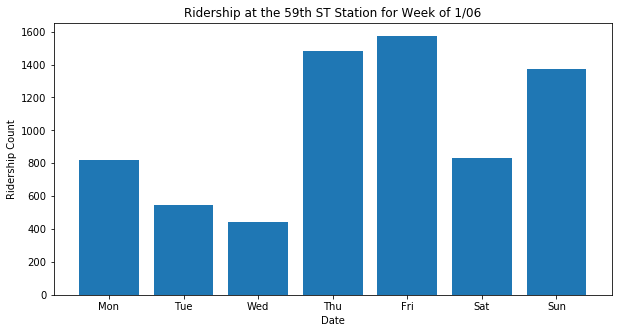

In [20]:
plt.figure(figsize = (10,5))
# plt.bar([x for x in list_1_f],[x for x in list_2_f])
plt.bar(range(len(list_2_f)), list_2_f);
plt.xticks(range(len(list_2_f)),['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Date')
plt.ylabel('Ridership Count')
plt.title('Ridership at the 59th ST Station for Week of 1/06')

# Challenge 5 - Weekly Aggregate for a ControlArea/Unit/Station Combination

In [27]:
from datetime import timedelta

SCP_Week_Count_f = defaultdict()

for k,v in day_counts_f.items():
    SCP_Week_Count_f[k[0],k[1],k[3]] = 0
    for i in v:
        SCP_Week_Count_f[k[0],k[1],k[3]] += i[1]
        
list(SCP_Week_Count_f.items())[:20]

[(('A002', 'R051', '59 ST'), 6961),
 (('A006', 'R079', '5 AV/59 ST'), 9821),
 (('A007', 'R079', '5 AV/59 ST'), 11101),
 (('A010', 'R080', '57 ST-7 AV'), 21868),
 (('A011', 'R080', '57 ST-7 AV'), 13263),
 (('A013', 'R081', '49 ST'), 0),
 (('A014', 'R081', '49 ST'), 75),
 (('A015', 'R081', '49 ST'), 4749),
 (('A016', 'R081', '49 ST'), 573),
 (('A021', 'R032', 'TIMES SQ-42 ST'), 8698),
 (('A022', 'R022', '34 ST-HERALD SQ'), 7570),
 (('A025', 'R023', '34 ST-HERALD SQ'), 4773),
 (('A027', 'R082', '28 ST'), 6105),
 (('A029', 'R082', '28 ST'), 8375),
 (('A030', 'R083', '23 ST'), 7483),
 (('A031', 'R083', '23 ST'), 6145),
 (('A033', 'R170', '14 ST-UNION SQ'), 9448),
 (('A034', 'R170', '14 ST-UNION SQ'), 6869),
 (('A035', 'R170', '14 ST-UNION SQ'), 14818),
 (('A037', 'R170', '14 ST-UNION SQ'), 21306)]

# Challenge 5 - Daily Aggregate for a ControlArea/Unit/Station Combination

In [29]:
SCP_Day_Count_f = defaultdict()

for k,v in day_counts_f.items():
    SCP_Day_Count_f[k[0],k[1],k[3]] = []
    for i in v:
        SCP_Day_Count_f[k[0],k[1],k[3]].append(i)
        
list(SCP_Day_Count_f.items())[:5]

[(('A002', 'R051', '59 ST'),
  [(datetime.date(2017, 12, 30), 740),
   (datetime.date(2017, 12, 31), 522),
   (datetime.date(2018, 1, 1), 416),
   (datetime.date(2018, 1, 2), 1434),
   (datetime.date(2018, 1, 3), 1552),
   (datetime.date(2018, 1, 4), 992),
   (datetime.date(2018, 1, 5), 1305)]),
 (('A006', 'R079', '5 AV/59 ST'),
  [(datetime.date(2017, 12, 30), 1234),
   (datetime.date(2017, 12, 31), 755),
   (datetime.date(2018, 1, 1), 571),
   (datetime.date(2018, 1, 2), 1920),
   (datetime.date(2018, 1, 3), 2141),
   (datetime.date(2018, 1, 4), 1421),
   (datetime.date(2018, 1, 5), 1779)]),
 (('A007', 'R079', '5 AV/59 ST'),
  [(datetime.date(2017, 12, 30), 1900),
   (datetime.date(2017, 12, 31), 1955),
   (datetime.date(2018, 1, 1), 1247),
   (datetime.date(2018, 1, 2), 1685),
   (datetime.date(2018, 1, 3), 1695),
   (datetime.date(2018, 1, 4), 1213),
   (datetime.date(2018, 1, 5), 1406)]),
 (('A010', 'R080', '57 ST-7 AV'),
  [(datetime.date(2017, 12, 30), 3100),
   (datetime.date(2

# Challenge 6 - Time Series for Each Station

In [30]:
SCP_Station_Count_f = defaultdict()

for k,v in day_counts_f.items():
    SCP_Station_Count_f[k[3]] = []
    for i in v:
        SCP_Station_Count_f[k[3]].append(tuple(i))

list(SCP_Station_Count_f.items())[:5]

[('59 ST',
  [(datetime.date(2017, 12, 30), 44),
   (datetime.date(2017, 12, 31), 37),
   (datetime.date(2018, 1, 1), 27),
   (datetime.date(2018, 1, 2), 155),
   (datetime.date(2018, 1, 3), 185),
   (datetime.date(2018, 1, 4), 77),
   (datetime.date(2018, 1, 5), 130)]),
 ('5 AV/59 ST',
  [(datetime.date(2017, 12, 30), 1900),
   (datetime.date(2017, 12, 31), 1955),
   (datetime.date(2018, 1, 1), 1247),
   (datetime.date(2018, 1, 2), 1685),
   (datetime.date(2018, 1, 3), 1695),
   (datetime.date(2018, 1, 4), 1213),
   (datetime.date(2018, 1, 5), 1406)]),
 ('57 ST-7 AV',
  [(datetime.date(2017, 12, 30), 1350),
   (datetime.date(2017, 12, 31), 947),
   (datetime.date(2018, 1, 1), 363),
   (datetime.date(2018, 1, 2), 2734),
   (datetime.date(2018, 1, 3), 3120),
   (datetime.date(2018, 1, 4), 2183),
   (datetime.date(2018, 1, 5), 2566)]),
 ('49 ST',
  [(datetime.date(2017, 12, 30), 125),
   (datetime.date(2017, 12, 31), 15),
   (datetime.date(2018, 1, 1), 87),
   (datetime.date(2018, 1, 2),

# Challenge 7 - Plottng Above Time Series

<Container object of 7 artists>

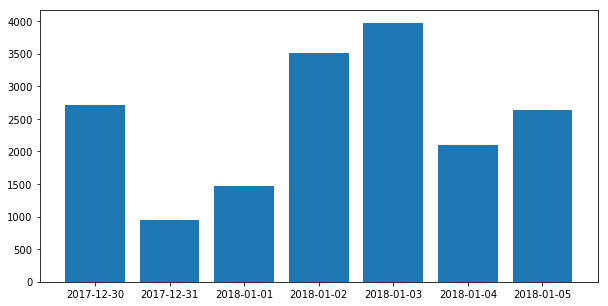

In [31]:
plt.figure(figsize = (10,5))
plt.bar([x for x,y in SCP_Station_Count_f['1 AV']],[y for x,y in SCP_Station_Count_f['1 AV']])         

# Challege 8 - Weekday Counts for Multiple Weeks 

In [32]:
# Download data for three additional weeks

!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_180113.txt
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_171230.txt
!curl -O http://web.mta.info/developers/data/nyct/turnstile/turnstile_171223.txt

with open('turnstile_180113.txt') as g, open('turnstile_171230.txt')as h, open('turnstile_171223.txt') as i :
    reader_g, reader_h, reader_i = csv.reader(g),csv.reader(h), csv.reader(i)
    rows_g = [[cell.strip() for cell in row] for row in reader_g]
    rows_h = [[cell.strip() for cell in row] for row in reader_h]
    rows_i = [[cell.strip() for cell in row] for row in reader_i]

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25.1M    0 25.1M    0     0  2954k      0 --:--:--  0:00:08 --:--:-- 1619k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.6M    0 24.6M    0     0  1958k      0 --:--:--  0:00:12 --:--:-- 1042k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 24.9M    0 24.9M    0     0  1644k      0 --:--:--  0:00:15 --:--:-- 1889k


In [33]:
rows_g.pop(0),rows_h.pop(0),rows_i.pop(0) # Check if header rows have been removed

(['C/A',
  'UNIT',
  'SCP',
  'STATION',
  'LINENAME',
  'DIVISION',
  'DATE',
  'TIME',
  'DESC',
  'ENTRIES',
  'EXITS'],
 ['C/A',
  'UNIT',
  'SCP',
  'STATION',
  'LINENAME',
  'DIVISION',
  'DATE',
  'TIME',
  'DESC',
  'ENTRIES',
  'EXITS'],
 ['C/A',
  'UNIT',
  'SCP',
  'STATION',
  'LINENAME',
  'DIVISION',
  'DATE',
  'TIME',
  'DESC',
  'ENTRIES',
  'EXITS'])

In [34]:
New_Dict_g=defaultdict(list)
New_Dict_h=defaultdict(list)
New_Dict_i=defaultdict(list)

datetime_cum_g = defaultdict()
datetime_cum_h = defaultdict()
datetime_cum_i = defaultdict()

# Split data into key value pairs for each turnstile

for row in rows_g:
    New_Dict_g[tuple(row[3:4])[0]].append(tuple(row[4:]))

for row in rows_h:
    New_Dict_h[tuple(row[3:4])[0]].append(tuple(row[4:]))
    
for row in rows_i:
    New_Dict_i[tuple(row[3:4])[0]].append(tuple(row[4:]))


# Create time series for each week
    
for station, rows in New_Dict_g.items():
    datetime_cum_g[station] = []
    for _, _, date, time,_, cum_count,_ in rows:
        datetime_cum_g[station].append((datetime.strptime(date + time,'%m/%d/%Y%X'),int(cum_count)))

for station, rows in New_Dict_h.items():
    datetime_cum_h[station] = []
    for _, _, date, time,_, cum_count,_ in rows:
        datetime_cum_h[station].append((datetime.strptime(date + time,'%m/%d/%Y%X'),int(cum_count)))

for station, rows in New_Dict_i.items():
    datetime_cum_i[station] = []
    for _, _, date, time,_, cum_count,_ in rows:
        datetime_cum_i[station].append((datetime.strptime(date + time,'%m/%d/%Y%X'),int(cum_count)))

In [35]:
for rows in datetime_cum_g.values():
    rows.sort()
    
for rows in datetime_cum_h.values():
    rows.sort()
   
for rows in datetime_cum_i.values():
    rows.sort()

In [36]:
#Generate time series with time delta

datetime_count_times_g = {}

for station, rows in datetime_cum_g.items():
    datetime_count_times_g[station] = []
    for i in range(len(rows) - 1):
        datetime_count_times_g[station].append([rows[i][0], rows[i+1][1] - rows[i][1]])
        
datetime_count_times_h = {}

for station, rows in datetime_cum_h.items():
    datetime_count_times_h[station] = []
    for i in range(len(rows) - 1):
        datetime_count_times_h[station].append([rows[i][0], rows[i+1][1] - rows[i][1]])

datetime_count_times_i = {}
        
for station, rows in datetime_cum_i.items():
    datetime_count_times_i[station] = []
    for i in range(len(rows) - 1):
        datetime_count_times_i[station].append([rows[i][0], rows[i+1][1] - rows[i][1]]) 

In [37]:
datetime_count_times_g[('59 ST')][:5],datetime_count_times_h[('59 ST')][:5], datetime_count_times_i[('59 ST')][:5] # Testing Data

([[datetime.datetime(2018, 1, 6, 3, 0), 0],
  [datetime.datetime(2018, 1, 6, 3, 0), 1458],
  [datetime.datetime(2018, 1, 6, 3, 0), 87009],
  [datetime.datetime(2018, 1, 6, 3, 0), 88232],
  [datetime.datetime(2018, 1, 6, 3, 0), 49746]],
 [[datetime.datetime(2017, 12, 23, 3, 0), 0],
  [datetime.datetime(2017, 12, 23, 3, 0), 1455],
  [datetime.datetime(2017, 12, 23, 3, 0), 85575],
  [datetime.datetime(2017, 12, 23, 3, 0), 78001],
  [datetime.datetime(2017, 12, 23, 3, 0), 60085]],
 [[datetime.datetime(2017, 12, 16, 3, 0), 0],
  [datetime.datetime(2017, 12, 16, 3, 0), 1453],
  [datetime.datetime(2017, 12, 16, 3, 0), 84583],
  [datetime.datetime(2017, 12, 16, 3, 0), 70951],
  [datetime.datetime(2017, 12, 16, 3, 0), 67305]])

In [38]:
# Create test lists for three weeks

test_list_g = []
for k,v in datetime_count_times_g.items():
    for i in v:
        test_list_g.append(i[1])
        
test_list_h = []
for k,v in datetime_count_times_h.items():
    for i in v:
        test_list_h.append(i[1])
        
test_list_i = []
for k,v in datetime_count_times_h.items():
    for i in v:
        test_list_i.append(i[1])

In [41]:
# Run test metrics for three weeks

heapq.nlargest(30, test_list_g), heapq.nsmallest(30,test_list_g), heapq.nlargest(30,test_list_h), heapq.nsmallest(100,test_list_h)

([2103364074,
  2103364028,
  2008738973,
  2008738882,
  2008738852,
  2008738717,
  2008738056,
  2008737132,
  2008736642,
  2008736480,
  2008736446,
  2008736330,
  2008735727,
  2008734968,
  2008734562,
  2008734511,
  2008734418,
  2008733945,
  2008732412,
  2008729459,
  2008728723,
  2008728593,
  2008728482,
  2008727969,
  2008726654,
  2008723372,
  2008722359,
  2008722240,
  2008722146,
  2008721974],
 [-2130094044,
  -2130093980,
  -2130093946,
  -2130093820,
  -2130093535,
  -2130093063,
  -2130093004,
  -2130092980,
  -2130092883,
  -2130092658,
  -2130092458,
  -2130092315,
  -2130092288,
  -2130092139,
  -2130091721,
  -2130090166,
  -2130088827,
  -2130088594,
  -2130088524,
  -2130088360,
  -2130087889,
  -2130086484,
  -2130085205,
  -2130084916,
  -2130084867,
  -2130084615,
  -2130084294,
  -2130082667,
  -2130081249,
  -2130080967],
 [2103382046,
  2008789664,
  2008789472,
  2008789421,
  2008789180,
  2008788364,
  2008787402,
  2008786841,
  2008786688,
  

In [42]:
# Filter out errant values

g_rev = {k: [x for x in v if 0 <= x[1] <= 13000] for k, v in datetime_count_times_g.items()}
h_rev = {k: [x for x in v if 0 <= x[1] <= 13000] for k, v in datetime_count_times_h.items()}
i_rev = {k: [x for x in v if 0 <= x[1] <= 13000] for k, v in datetime_count_times_i.items()}

In [43]:
# Generate weekday counts for each station

day_counts_f = {}
for station, rows in SCP_Station_Count_f.items():
    by_day_f = defaultdict(int)
    for time, count in rows:
        day = time.weekday()
        by_day_f[day] += count
    day_counts_f[station] = sorted(by_day_f.items())

day_counts_g = {}
for station, rows in g_rev.items():
    by_day_g = defaultdict(int)
    for time, count in rows:
        day = time.weekday()
        by_day_g[day] += count
    day_counts_g[station] = sorted(by_day_g.items())
    
day_counts_h = {}
for station, rows in h_rev.items():
    by_day_h = defaultdict(int)
    for time, count in rows:
        day = time.weekday()
        by_day_h[day] += count
    day_counts_h[station] = sorted(by_day_h.items())
    
day_counts_i = {}
for station, rows in i_rev.items():
    by_day_i = defaultdict(int)
    for time, count in rows:
        day = time.weekday()
        by_day_i[day] += count
    day_counts_i[station] = sorted(by_day_i.items())

In [44]:
day_counts_g['59 ST'][:3], day_counts_h['59 ST'][:3], day_counts_i['59 ST'][:3], day_counts_f['59 ST'][:3] # Test data

# It seems that the data forthe '59 ST' station is erroneous for week 1/06

([(0, 57082), (1, 17632), (2, 16503)],
 [(0, 85707), (1, 89441), (2, 99851)],
 [(0, 95346), (1, 93800), (2, 93730)],
 [(0, 27), (1, 155), (2, 185)])

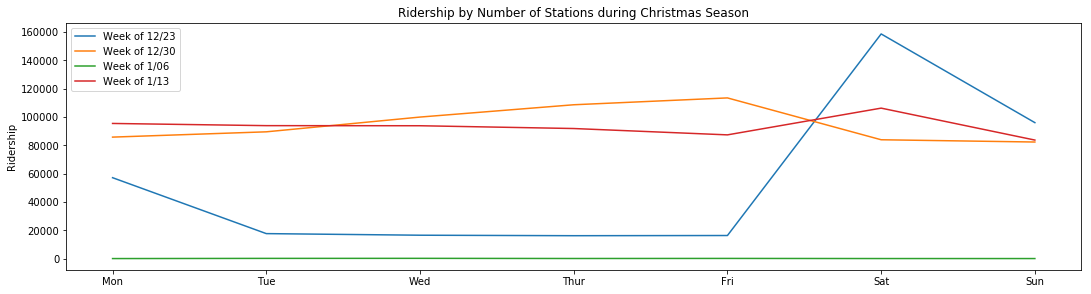

In [45]:
# Plot the data

weekdays = ['Mon','Tue','Wed', 'Thur', 'Fri','Sat','Sun']
fig = plt.figure(figsize = (40,10));
ax1 = fig.add_subplot(221);
ax2 = fig.add_subplot(221);
ax3 = fig.add_subplot(221);
ax4 = fig.add_subplot(221);
ax1.plot([x for x,y in day_counts_g['59 ST']],[y for x,y in day_counts_g['59 ST']], label = 'Week of 12/23');
ax1.legend()
ax2.plot([x for x,y in day_counts_h['59 ST']],[y for x,y in day_counts_h['59 ST']], label = 'Week of 12/30' );
ax2.legend()
ax3.plot([x for x,y in day_counts_f['59 ST']],[y for x,y in day_counts_f['59 ST']], label = 'Week of 1/06');
ax3.legend()
ax4.plot([x for x,y in day_counts_i['59 ST']],[y for x,y in day_counts_i['59 ST']], label = 'Week of 1/13');
ax4.legend()
plt.xticks([x for x,y in day_counts_g['59 ST']],[str(x) for x in weekdays]);
plt.ylabel('Ridership');
plt.title('Ridership by Number of Stations during Christmas Season');


# Once again, data for the '59 ST' station is erroneous for week 1/06

# Challenge 9 - Sorted and Max Station Counts for Combined Weeks 

In [46]:
Consolidated_Dict = defaultdict()

New_List = [day_counts_g, day_counts_h, day_counts_i]

for i in New_List:
    for k,v in i.items():
        Consolidated_Dict[k] = 0
        for j in v:
            Consolidated_Dict[k] += j[1]

In [47]:
max(Consolidated_Dict.items(), key=operator.itemgetter(1))[0]

'METS-WILLETS PT'

In [51]:
sorted_list = sorted(Consolidated_Dict.items(), key=operator.itemgetter(1), reverse = True) # Station counts sorted
sorted_list[:10]

[('METS-WILLETS PT', 3190387),
 ('34 ST-PENN STA', 2893427),
 ('FULTON ST', 2863526),
 ('CORTLANDT ST', 2215685),
 ('ATL AV-BARCLAY', 1955074),
 ('TIMES SQ-42 ST', 1701810),
 ('WALL ST', 1101202),
 ('34 ST-HERALD SQ', 1008735),
 ('66 ST-LINCOLN', 1001422),
 ('HOWARD BCH JFK', 967532)]

# Challenge 10 - Histogram for Counts of Stations by Binned Ridership  

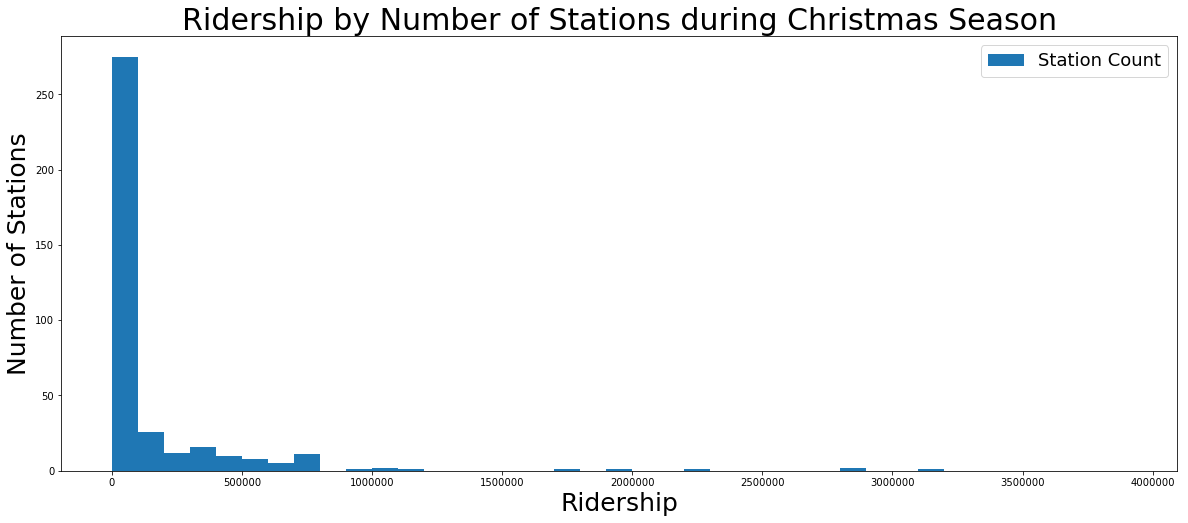

In [52]:
plt.figure(figsize = (20,8));
plt.xlabel('Ridership', fontsize = 25);
plt.ylabel('Number of Stations', fontsize = 25);
plt.title('Ridership by Number of Stations during Christmas Season', fontsize = 30);
plt.hist([x for x in Consolidated_Dict.values()], bins = range(0,4000000,100000));
plt.legend(['Station Count'], fontsize = 18);